# **Deep Learning HW5**

**Emirhan ÇETİNTÜRK**

**152120201124**

---


Colaboratory'nin Drive ile iletişimine izin verildi. Sonraki adımda ise CaltechTinySplit isimli ZIP dosyasının içeriği aynı isme sahip bir klasöre çıkartıldı.

In [1]:
if 0:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if 0:
    ! cp /content/drive/MyDrive/HW5-gear.zip /content/
    ! unzip HW5-gear.zip -d /content/HW5-gear

Archive:  HW5-gear.zip
  inflating: /content/HW5-gear/data/DataForClassification_Stage0.npy  
  inflating: /content/HW5-gear/data/DataForClassification_TimeDomain.npy  
  inflating: /content/HW5-gear/HW5-gear.pdf  




---

Keras için gerekli Tensorflow eklentilerinin bulunduğu kütüphane kuruldu.


---



In [3]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.6 MB/s 


---

İşlemlerin daha hızlı gerçekleştirilebilmesi için program GPU ile çalıştırıldı. Bunun için "nvidia-smi" komutu konfigürasyon için çalıştırıldı.

---

In [4]:
!nvidia-smi  # GPU Configuration

Mon Dec 12 18:17:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

Gerekli kütüphaneler eklendi.

---

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "/content/digit-recognizer/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

# Load Data

---

Ödev için kullanılacak olan veri seti yüklendi. Veri seti 9 adet sınıftan oluşuyor.

---



In [6]:
X_train = np.load('/content/HW5-gear/data/DataForClassification_TimeDomain.npy')
X_train = np.transpose(X_train)
print(X_train.shape)

(936, 3600)


In [7]:
#types=9={'healthy','missing','crack','spall','chip5a','chip4a','chip3a','chip2a','chip1a'}

---

936 adet eleman sınıflara bölündü. Her bir sınıfın indisi ekrana bastırıldı.

---



In [8]:
Y_train = np.zeros((936,1))
label=0
print(label)
for i in range(936):

  Y_train[i]=label
  if (i%104==0) and (i!=0):
     label = label +1
     print(label)

0
1
2
3
4
5
6
7
8


In [9]:
Y_train[104:103*2]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

---

Y_train içerisinde sınıf kategorileştirme gerçekleştirildi.

---



In [11]:
import tensorflow as tf

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 9)

---

Test amaçlı olarak 101. ve 105. indislerde bulunan elemanların bulunduğu sınıflar ekrana bastırıldı. (Sırasıyla 1. ve 2. sınıflarda bulunuyorlar.)

---



In [12]:
print(Y_train[101,:])
print(Y_train[105,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Plot Digits

---

Belirtilen yüzdelikler sayesinde train, validation ve test sınıfları sırasıyla 70%, 10% ve 20% oranlara sahip oldu.

---



In [13]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=1 - train_ratio, shuffle=True, random_state=0)

# test is now 20% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=True, random_state=0) 

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(655, 3600)
(93, 3600)
(188, 3600)


---

Tüm sınıflara ekstra bir adet boyut eklendi.

---



In [14]:
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)
X_test = np.expand_dims(X_test, axis=1)
Y_train = np.expand_dims(Y_train, axis=1)
Y_val = np.expand_dims(Y_val, axis=1)
Y_test = np.expand_dims(Y_test, axis=1)

In [15]:
import tensorflow_addons as tfa
from keras import layers

---

Modele ödevde belirtilen modelden farklı olarak ekstradan bir adet daha Dense eklendi. Sonrasında build edildi.

---



In [16]:
model = Sequential()

model.add(layers.GRU(32, input_shape=(1, 3600), return_sequences=True))
model.add(layers.GRU(32, input_shape=(1, 3600), return_sequences=True))
model.add(layers.GRU(32, input_shape=(1, 3600), return_sequences=True))
model.add(layers.Dense(8))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8))
model.add(layers.Dropout(0.1))
model.add(Dense(9, activation='softmax')) #burayi 9 yapacaksaniz

In [17]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 32)             348864    
                                                                 
 gru_1 (GRU)                 (None, 1, 32)             6336      
                                                                 
 gru_2 (GRU)                 (None, 1, 32)             6336      
                                                                 
 dense (Dense)               (None, 1, 8)              264       
                                                                 
 dropout (Dropout)           (None, 1, 8)              0         
                                                                 
 dense_1 (Dense)             (None, 1, 8)              72        
                                                                 
 dropout_1 (Dropout)         (None, 1, 8)              0

---

Optimizer Adam olarak ayarlandı ve learning rate belirtildi.

---



In [18]:
adam = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


---

Modelin kaydedileceği dosya belirtildi. Early_stop ve reduce_lr koşulları model fit edilirken parametre olarak eklenecek şekilde build edildi.

---



In [19]:
# Set a learning rate annealer
import tensorflow as tf


model_name_save= '/content/GearFaultModel.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  
early_stop = tf.keras.callbacks.EarlyStopping(  monitor='val_accuracy', patience=12, verbose=1,  mode='max',restore_best_weights=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(  monitor='val_accuracy', factor=0.3, patience=7,  min_lr=1e-5, verbose=1,  mode='max')


In [20]:
X_train.shape

(655, 1, 3600)

---

Model fit edildi. Early stop parametresine takıldı.

---



In [21]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=64, callbacks=[checkpoint, early_stop])

Epoch 1/50
 8/11 [====================>.........] - ETA: 0s - loss: 2.1762 - accuracy: 0.1445  
Epoch 1: val_accuracy improved from -inf to 0.26882, saving model to /content/GearFaultModel.hdf5
11/11 [==============================] - 10s 107ms/step - loss: 2.1689 - accuracy: 0.1542 - val_loss: 2.0786 - val_accuracy: 0.2688
Epoch 2/50
 8/11 [====================>.........] - ETA: 0s - loss: 2.0365 - accuracy: 0.2676
Epoch 2: val_accuracy improved from 0.26882 to 0.27957, saving model to /content/GearFaultModel.hdf5
11/11 [==============================] - 0s 15ms/step - loss: 2.0280 - accuracy: 0.2641 - val_loss: 1.8628 - val_accuracy: 0.2796
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.8138 - accuracy: 0.3542
Epoch 3: val_accuracy improved from 0.27957 to 0.38710, saving model to /content/GearFaultModel.hdf5
11/11 [==============================] - 0s 19ms/step - loss: 1.8138 - accuracy: 0.3542 - val_loss: 1.6435 - val_accuracy: 0.3871
Epoch 4/50
 7/11 [======

---

Train, validation ve test sınıfları evaluate edildi. Her bir sınıfın loss ve accuracy değerleri ekrana bastırıldı.

---

In [22]:
test_scores = model.evaluate(X_test, Y_test)
val_scores = model.evaluate(X_val, Y_val)
train_scores = model.evaluate(X_val, Y_val)

3/3 [==============================] - 0s 6ms/step - loss: 1.2665 - accuracy: 0.9140


In [23]:
print('             Test Scores')
print('Loss         : ', test_scores[0])
print('Accuracy     : ', test_scores[1])

             Test Scores
Loss         :  0.48498570919036865
Accuracy     :  0.9468085169792175


In [24]:
print('             Validation Scores')
print('Loss         : ', val_scores[0])
print('Accuracy     : ', val_scores[1])

             Validation Scores
Loss         :  1.2665098905563354
Accuracy     :  0.9139785170555115


In [25]:
print('             Train Scores')
print('Loss         : ', train_scores[0])
print('Accuracy     : ', train_scores[1])

             Train Scores
Loss         :  1.2665098905563354
Accuracy     :  0.9139785170555115


# Let's predict test data

---

Model predict edildi. Y_pred ve Y_test sınıflarının boyutları ekrana bastırıldı. Confusion matrix elde edebilmek için Y_test sınıfı 3 boyuttan 2 sınıfa düşürüldü. (reshape)

---

In [26]:
Y_pred = model.predict(X_test, batch_size=1)
Y_pred = Y_pred.squeeze()

188/188 [==============================] - 1s 2ms/step


In [27]:
print(Y_pred.shape)
print(Y_test.shape)

(188, 9)
(188, 1, 9)


In [28]:
Y_test = np.reshape(Y_test, (Y_test.shape[0],Y_test.shape[2]))

In [29]:
print(Y_test.shape)

(188, 9)


In [30]:
from sklearn.metrics import mean_squared_error

---

GRU modelinin hata değerleri ekrana bastırıldı.

---

In [31]:
errors = Y_pred - Y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()
print("GRU:")
print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))

GRU:
Mean Absolute Error: 0.0147
Mean Squared Error: 0.0108
Root Mean Squared Error: 0.1042


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

---

Accuracy skoru farklı bir fonksiyon ile ekrana bastırıldı. (Tahminimce Y_pred round edildiğinden dolayı doğru değeri veremiyor. round işlemi gerçekleştirilmediğinde program hata fırlatıyor.)

---

In [33]:
accuracy_score(Y_test, Y_pred.round(), normalize=True)

0.9468085106382979

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

---

Confusion matrix ekrana görselleştirilmiş bir şekilde bastırılıyor.

---

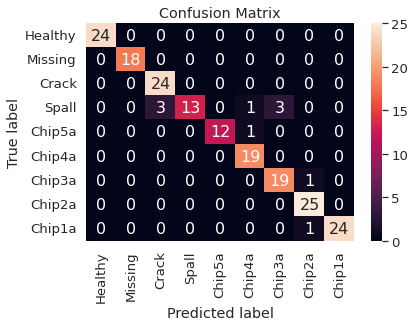

In [35]:
target_names = ['Healthy','Missing','Crack','Spall','Chip5a','Chip4a','Chip3a','Chip2a','Chip1a']
array = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

df_cm = pd.DataFrame(array, index = [i for i in target_names],
                     columns = [i for i in target_names])
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

---

Classification report, precision, recall, f1-score ve sınıfların sahip olduğu eleman sayılarını ve son olarak accuracy skorunu ekrana bastıracak şekilde bastırılıyor.

---

In [36]:
print('Classification Report')
target_names = ['Healthy','Missing','Crack','Spall','Chip5a','Chip4a','Chip3a','Chip2a','Chip1a']
print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        24
     Missing       1.00      1.00      1.00        18
       Crack       0.89      1.00      0.94        24
       Spall       1.00      0.65      0.79        20
      Chip5a       1.00      0.92      0.96        13
      Chip4a       0.90      1.00      0.95        19
      Chip3a       0.86      0.95      0.90        20
      Chip2a       0.93      1.00      0.96        25
      Chip1a       1.00      0.96      0.98        25

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.94       188



---

Train ve test sınıflarının epoch esnasında elde ettikleri hata değerleri grafik halinde ekrana bastırılıyor.

---

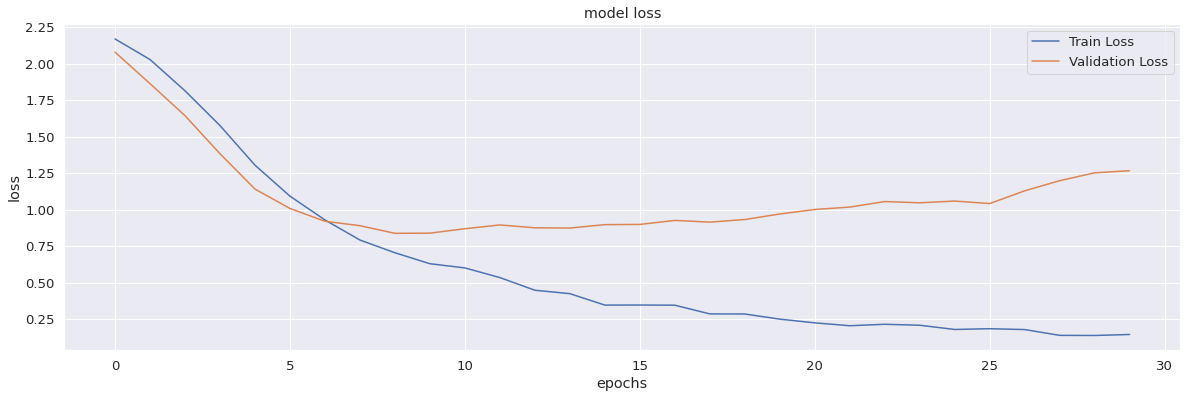

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()
     

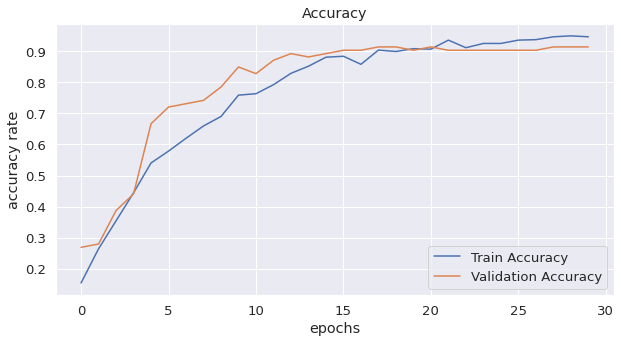

In [38]:
plt.figure(figsize=(10,5))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('accuracy rate')
plt.xlabel('epochs')
plt.legend()
plt.show()